
## Step 2: Understanding the information 

### Background: 
Once we have the information from the satellite band pixels and the respective soil moisture values, it is important we understand the different relationships between the value to model (output) and the information we will use to predict (inputs). 

How many inputs we can have? This is a good question. The answer is as many as the modeler ingenuity can generate. To give you an example with this data. The Landsat satellite has 7 spectral bands (red, green, blue, near infrared, sortwave band 1, shortwave band 2, and thermal). SO far, 7 potential inputs. Now, in remote sensing we have a concept called "vegetation indices" that is an algebraic combination of certain bands that "enhance" certain conditions of the ground (vegetation health/occurrence, soil condition/ocurrence, water occurrence/temperature/sedimentation, etc). Some of these indices may have a direct relationship with soil moisture, but other we, as human, may not recognize as important input. So, going back to the question again, 

In this case, we are going to use the Relevance Vector Machine algorithm. You can read the original paper here: https://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf. This algorithm is a good example of a "classical machine learning", different of more recent algorithms such as Deep Learning (e.g. Convolutional Neural Networks). The advantage of classical machine learning is the need of much less information than deep learning algorithms.

Let's install the necessary python library. Open the terminal and pass the following command.

Let's start importing the csv files generated in Step 1:

In [1]:
import pandas as pd
sm_data_may_13 = pd.read_csv('./Results Step 1/landsat7_may_13_sm_pixels.csv')
sm_data_may_13.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_ATMOS_OPACITY,SR_CLOUD_QA,ST_B6,ST_ATRAN,...,CROP,SM0529,SM0513,SA0529,SM0614,T0529,SA0513,SA0614,sampling p,SA0630
0,0.048572,0.08149,0.067767,0.389078,0.202627,0.100602,0.409,NaN,299.068168,0.948,...,alfalfa,0.14,0.39,0.09,0.10,25.80,0.60,0.00,1,0.05
1,0.051515,0.08468,0.073432,0.385447,0.209448,0.104040,0.409,NaN,299.368954,0.948,...,alfalfa,0.15,0.32,0.07,0.11,25.23,0.59,0.02,2,0.05
2,0.063257,0.09733,0.079070,0.370955,0.199245,0.100630,0.410,NaN,299.871403,0.948,...,grain,0.54,0.50,0.36,0.29,24.03,1.01,0.40,3,0.01


In [2]:
import pandas as pd
sm_data_may_29 = pd.read_csv('./Results Step 1/landsat7_may_29_sm_pixels.csv')
sm_data_may_29.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_ATMOS_OPACITY,SR_CLOUD_QA,ST_B6,ST_ATRAN,...,CROP,SM0529,SM0513,SA0529,SM0614,T0529,SA0513,SA0614,sampling p,SA0630
0,0.026270,0.060452,0.041615,0.495613,0.184972,0.078493,0.246,NaN,301.371914,0.9356,...,alfalfa,0.14,0.39,0.09,0.10,25.80,0.60,0.00,1,0.05
1,0.031633,0.063340,0.046840,0.464400,0.194900,0.091940,0.246,NaN,301.966649,0.9356,...,alfalfa,0.15,0.32,0.07,0.11,25.23,0.59,0.02,2,0.05
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,grain,0.54,0.50,0.36,0.29,24.03,1.01,0.40,3,0.01


In [3]:
import pandas as pd
sm_data_jun_14 = pd.read_csv('./Results Step 1/landsat7_jun_14_sm_pixels.csv')
sm_data_jun_14.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_ATMOS_OPACITY,SR_CLOUD_QA,ST_B6,ST_ATRAN,...,CROP,SM0529,SM0513,SA0529,SM0614,T0529,SA0513,SA0614,sampling p,SA0630
0,0.093728,0.131678,0.143365,0.372000,0.311720,0.189702,0.016,NaN,313.834015,0.8703,...,alfalfa,0.14,0.39,0.09,0.10,25.80,0.60,0.00,1,0.05
1,0.093728,0.136958,0.150625,0.368590,0.318182,0.199575,0.016,NaN,314.127964,0.8703,...,alfalfa,0.15,0.32,0.07,0.11,25.23,0.59,0.02,2,0.05
2,0.062817,0.094552,0.099832,0.334628,0.169793,0.104205,0.016,NaN,305.600004,0.8701,...,grain,0.54,0.50,0.36,0.29,24.03,1.01,0.40,3,0.01


In [4]:
import pandas as pd
sm_data_jun_30 = pd.read_csv('./Results Step 1/landsat7_jun_30_sm_pixels.csv')
sm_data_jun_30.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B7,SR_ATMOS_OPACITY,SR_CLOUD_QA,ST_B6,ST_ATRAN,...,CROP,SM0529,SM0513,SA0529,SM0614,T0529,SA0513,SA0614,sampling p,SA0630
0,0.073350,0.113308,0.119632,0.392927,0.270855,0.150487,0.01,NaN,310.956042,0.9354,...,alfalfa,0.14,0.39,0.09,0.10,25.80,0.60,0.00,1,0.05
1,0.073350,0.115947,0.119632,0.392927,0.267637,0.150487,0.01,NaN,311.232901,0.9354,...,alfalfa,0.15,0.32,0.07,0.11,25.23,0.59,0.02,2,0.05
2,0.078107,0.123922,0.165612,0.321510,0.225535,0.147215,0.01,NaN,316.089908,0.9355,...,grain,0.54,0.50,0.36,0.29,24.03,1.01,0.40,3,0.01


let's check column names:

In [5]:
print(sorted(sm_data_jun_30))

['AFRI1600', 'AFRI2100', 'ARVI', 'ATSAVI', 'AVI', 'BCC', 'BNDVI', 'BWDRVI', 'CIG', 'CROP', 'CVI', 'DSI', 'DSWI1', 'DSWI2', 'DSWI3', 'DSWI4', 'DSWI5', 'DVI', 'DVIplus', 'EVI', 'EVI2', 'ExG', 'ExGR', 'ExR', 'FCVI', 'FIELD', 'GARI', 'GBNDVI', 'GCC', 'GDVI', 'GEMI', 'GLI', 'GNDVI', 'GOSAVI', 'GRNDVI', 'GRVI', 'GSAVI', 'GVMI', 'IAVI', 'IKAW', 'IPVI', 'MCARI1', 'MCARI2', 'MGRVI', 'MNDVI', 'MNLI', 'MRBVI', 'MSAVI', 'MSI', 'MSR', 'MTVI1', 'MTVI2', 'NDDI', 'NDGI', 'NDII', 'NDMI', 'NDPI', 'NDVI', 'NDYI', 'NGRDI', 'NIRv', 'NIRvH2', 'NLI', 'NMDI', 'NRFIg', 'NRFIr', 'NormG', 'NormNIR', 'NormR', 'OCVI', 'OSAVI', 'QA_PIXEL', 'QA_RADSAT', 'RCC', 'RDVI', 'RGBVI', 'RGRI', 'RI', 'SA0513', 'SA0529', 'SA0614', 'SA0630', 'SARVI', 'SAVI', 'SAVI2', 'SEVI', 'SI', 'SM0513', 'SM0529', 'SM0614', 'SM0630', 'SR', 'SR2', 'SR_ATMOS_OPACITY', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'SR_CLOUD_QA', 'ST_ATRAN', 'ST_B6', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'T0513', 'T0

Let's extract the inputs (bands and vegetation indices) and outputs (soil moisture)

In [6]:
bands=['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','ST_B6','SR_B7']
vegetation=['AFRI1600', 'AFRI2100', 'ARVI', 'ATSAVI', 'AVI', 'BCC',
            'BNDVI', 'BWDRVI','CROP', 'CIG', 'CVI', 'DSI', 'DSWI1',
            'DSWI2', 'DSWI3', 'DSWI4', 'DSWI5', 'DVI', 'DVIplus',
            'EVI', 'EVI2', 'ExG', 'ExGR', 'ExR', 'FCVI', 'GARI', 
            'GBNDVI', 'GCC', 'GDVI', 'GEMI', 'GLI', 'GNDVI', 
            'GOSAVI', 'GRNDVI', 'GRVI', 'GSAVI', 'GVMI', 'IAVI',
            'IKAW', 'IPVI', 'MCARI1', 'MCARI2', 'MGRVI', 'MNDVI', 
            'MNLI', 'MRBVI', 'MSAVI', 'MSI', 'MSR', 'MTVI1', 
            'MTVI2', 'NDDI', 'NDGI', 'NDII', 'NDMI', 'NDPI', 
            'NDVI', 'NDYI', 'NGRDI', 'NIRv', 'NIRvH2', 'NLI',
            'NMDI', 'NRFIg', 'NRFIr', 'NormG', 'NormNIR', 'NormR',
            'OCVI', 'OSAVI',  'RCC', 'RDVI', 'RGBVI', 'RGRI', 
            'RI',  'SARVI', 'SAVI', 'SAVI2', 'SEVI', 'SI', 
             'SR', 'SR2', 'TDVI', 'TGI', 'TSAVI', 'TVI', 'TriVI',
            'VARI', 'VIG', 'WDRVI', 'WDVI']
# burn =['BAI','NBR','CSIT','NBRT','NDVIT','SAVIT']
# water=['MNDWI','NDWI']
# snow=['NDSI']
# drought=['NDDI']
# kernel=['kEVI','kNDVI','kRVI','kVARI']


In [7]:
# bands+ vegetation+burn+water+snow+drought+kernel
landsat7_may_13_sm_pixels=sm_data_may_13[bands+ vegetation+['SM0513']]
landsat7_may_29_sm_pixels=sm_data_may_29[bands+ vegetation+['SM0529']]
landsat7_jun_14_sm_pixels=sm_data_jun_14[bands+ vegetation+['SM0614']]
landsat7_jun_30_sm_pixels=sm_data_jun_30[bands+ vegetation+['SM0630']]


landsat7_may_29_sm_pixels.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,AFRI1600,AFRI2100,ARVI,...,TDVI,TGI,TSAVI,TVI,TriVI,VARI,VIG,WDRVI,WDVI,SM0529
0,0.026270,0.060452,0.041615,0.495613,0.184972,301.371914,0.078493,0.604718,0.853246,0.899326,...,0.767519,2.710263,0.845075,1.159774,27.99335,0.248524,0.184559,0.087153,0.453997,0.14
1,0.031633,0.063340,0.046840,0.464400,0.194900,301.966649,0.091940,0.566183,0.819856,0.872458,...,0.717279,2.479950,0.816759,1.147501,25.71360,0.210064,0.149755,-0.004288,0.417560,0.15
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54


Now let's combine them all

In [8]:
sm_data_may_13 = landsat7_may_13_sm_pixels.rename({'SM0513': 'SM'}, axis=1)

sm_data_may_29 = landsat7_may_29_sm_pixels.rename({'SM0529': 'SM'}, axis=1)

sm_data_jun_14 = landsat7_jun_14_sm_pixels.rename({'SM0614': 'SM'}, axis=1)

sm_data_jun_30 = landsat7_jun_30_sm_pixels.rename({'SM0630': 'SM'}, axis=1)

sm_data_jun_30.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,AFRI1600,AFRI2100,ARVI,...,TDVI,TGI,TSAVI,TVI,TriVI,VARI,VIG,WDRVI,WDVI,SM
0,0.073350,0.113308,0.119632,0.392927,0.270855,310.956042,0.150487,0.374613,0.678563,0.685380,...,0.465957,2.176075,0.533196,1.016463,16.14470,-0.039633,-0.027153,-0.505519,0.273295,0.13
1,0.073350,0.115947,0.119632,0.392927,0.267637,311.232901,0.150487,0.379738,0.678563,0.685380,...,0.465957,2.426875,0.533196,1.016463,16.25030,-0.022715,-0.015642,-0.505519,0.273295,0.13
2,0.078107,0.123922,0.165612,0.321510,0.225535,316.089908,0.147215,0.367072,0.627415,0.609089,...,0.266669,1.289750,0.320038,0.905559,7.68625,-0.197183,-0.143990,-0.674854,0.155897,0.08


In [9]:
sm=pd.concat([sm_data_may_13,sm_data_may_29])
sm=pd.concat([sm,sm_data_jun_14])
sm=pd.concat([sm,sm_data_jun_30])

sm

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,AFRI1600,AFRI2100,ARVI,...,TDVI,TGI,TSAVI,TVI,TriVI,VARI,VIG,WDRVI,WDVI,SM
0,0.048572,0.081490,0.067767,0.389078,0.202627,299.068168,0.100602,0.488404,0.771035,0.778030,...,0.568337,2.455338,0.703324,1.096961,19.82750,0.136291,0.091938,-0.270538,0.321310,0.39
1,0.051515,0.084680,0.073432,0.385447,0.209448,299.368954,0.104040,0.472065,0.762177,0.764213,...,0.550804,2.383562,0.679949,1.086255,19.17080,0.105514,0.071136,-0.311561,0.312015,0.32
2,0.063257,0.097330,0.079070,0.370955,0.199245,299.871403,0.100630,0.476565,0.761127,0.708633,...,0.517179,2.683450,0.648597,1.071726,18.24350,0.161389,0.103515,-0.361334,0.291885,0.50
3,0.063257,0.097330,0.084707,0.363613,0.202682,300.469556,0.100630,0.462103,0.756890,0.703622,...,0.494096,2.486137,0.622111,1.059298,17.23920,0.106268,0.069340,-0.399329,0.278905,0.47
4,0.130055,0.169517,0.209860,0.271680,0.335288,318.506448,0.297117,0.102218,0.292979,0.352533,...,0.104750,0.955763,0.128380,0.792704,2.09550,-0.161809,-0.106339,-0.770761,0.061820,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.037325,0.070820,0.044310,0.562437,0.212637,304.837786,0.091197,0.600612,0.850013,0.875534,...,0.837752,2.937550,0.853943,1.163590,32.14805,0.340724,0.230261,0.118680,0.518127,0.17
16,0.075742,0.110667,0.119632,0.440557,0.296815,314.076694,0.170287,0.384410,0.676076,0.706595,...,0.533650,1.781725,0.572886,1.035802,18.89690,-0.058004,-0.038927,-0.461712,0.320925,0.11
17,0.080500,0.123922,0.141467,0.454170,0.329210,314.941453,0.183460,0.352806,0.663931,0.698880,...,0.509439,1.991275,0.524988,1.012417,18.06035,-0.094894,-0.066110,-0.513956,0.312702,0.08
18,0.056547,0.084102,0.073515,0.453977,0.206093,306.806565,0.094470,0.538911,0.811517,0.778473,...,0.646345,2.023863,0.721266,1.105109,23.25125,0.104754,0.067172,-0.236453,0.380462,0.16


Se saw that landsat 7 has some missing pixels (due to sensor malfunction). In some dates, our SM coordinates fall into these missing pixels. So we need to eliminate those rows where in our table we got NaN (not a number) values.

In [10]:
sm = sm.dropna()
sm['CROP'] = sm.CROP.astype('category')
sm

/tmp/ipykernel_265/322649861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm['CROP'] = sm.CROP.astype('category')


,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,AFRI1600,AFRI2100,ARVI,...,TDVI,TGI,TSAVI,TVI,TriVI,VARI,VIG,WDRVI,WDVI,SM
0,0.048572,0.081490,0.067767,0.389078,0.202627,299.068168,0.100602,0.488404,0.771035,0.778030,...,0.568337,2.455338,0.703324,1.096961,19.82750,0.136291,0.091938,-0.270538,0.321310,0.39
1,0.051515,0.084680,0.073432,0.385447,0.209448,299.368954,0.104040,0.472065,0.762177,0.764213,...,0.550804,2.383562,0.679949,1.086255,19.17080,0.105514,0.071136,-0.311561,0.312015,0.32
2,0.063257,0.097330,0.079070,0.370955,0.199245,299.871403,0.100630,0.476565,0.761127,0.708633,...,0.517179,2.683450,0.648597,1.071726,18.24350,0.161389,0.103515,-0.361334,0.291885,0.50
3,0.063257,0.097330,0.084707,0.363613,0.202682,300.469556,0.100630,0.462103,0.756890,0.703622,...,0.494096,2.486137,0.622111,1.059298,17.23920,0.106268,0.069340,-0.399329,0.278905,0.47
4,0.130055,0.169517,0.209860,0.271680,0.335288,318.506448,0.297117,0.102218,0.292979,0.352533,...,0.104750,0.955763,0.128380,0.792704,2.09550,-0.161809,-0.106339,-0.770761,0.061820,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.037325,0.070820,0.044310,0.562437,0.212637,304.837786,0.091197,0.600612,0.850013,0.875534,...,0.837752,2.937550,0.853943,1.163590,32.14805,0.340724,0.230261,0.118680,0.518127,0.17
16,0.075742,0.110667,0.119632,0.440557,0.296815,314.076694,0.170287,0.384410,0.676076,0.706595,...,0.533650,1.781725,0.572886,1.035802,18.89690,-0.058004,-0.038927,-0.461712,0.320925,0.11
17,0.080500,0.123922,0.141467,0.454170,0.329210,314.941453,0.183460,0.352806,0.663931,0.698880,...,0.509439,1.991275,0.524988,1.012417,18.06035,-0.094894,-0.066110,-0.513956,0.312702,0.08
18,0.056547,0.084102,0.073515,0.453977,0.206093,306.806565,0.094470,0.538911,0.811517,0.778473,...,0.646345,2.023863,0.721266,1.105109,23.25125,0.104754,0.067172,-0.236453,0.380462,0.16


Let's asses the relationship among the bands and soil moisture

In [11]:
len(vegetation)

91

In [12]:
df = pd.melt(sm, id_vars=["SM", 'CROP'], value_name="values")
df['CROP'] = df.CROP.astype('category')

df.head(3)

,SM,CROP,variable,values
0,0.39,alfalfa,SR_B1,0.048572
1,0.32,alfalfa,SR_B1,0.051515
2,0.50,grain,SR_B1,0.063257


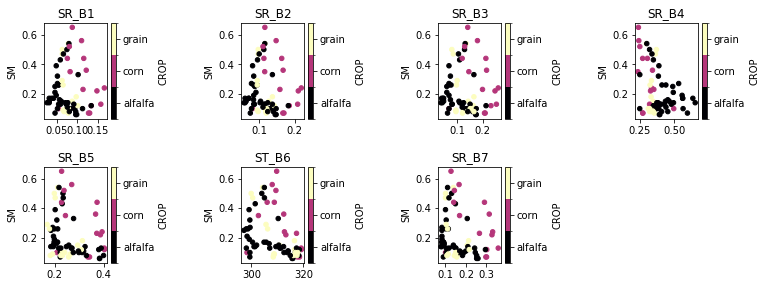

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 60))
plt.subplots_adjust(hspace=0.5, wspace=1.5)
# plt.suptitle("SM vs vegetation indices", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, veg_index in enumerate(bands):
    # add a new subplot iteratively
    ax = plt.subplot(23, 4, n + 1)

    # filter df and plot ticker on the new subplot axis
    df[df["variable"] == veg_index].plot(ax=ax, kind='scatter',y ='SM', x='values',c = 'CROP' , cmap = "magma")

    # chart formatting
    ax.set_title(veg_index.upper())
    # ax.get_legend().remove()
    ax.set_xlabel("")

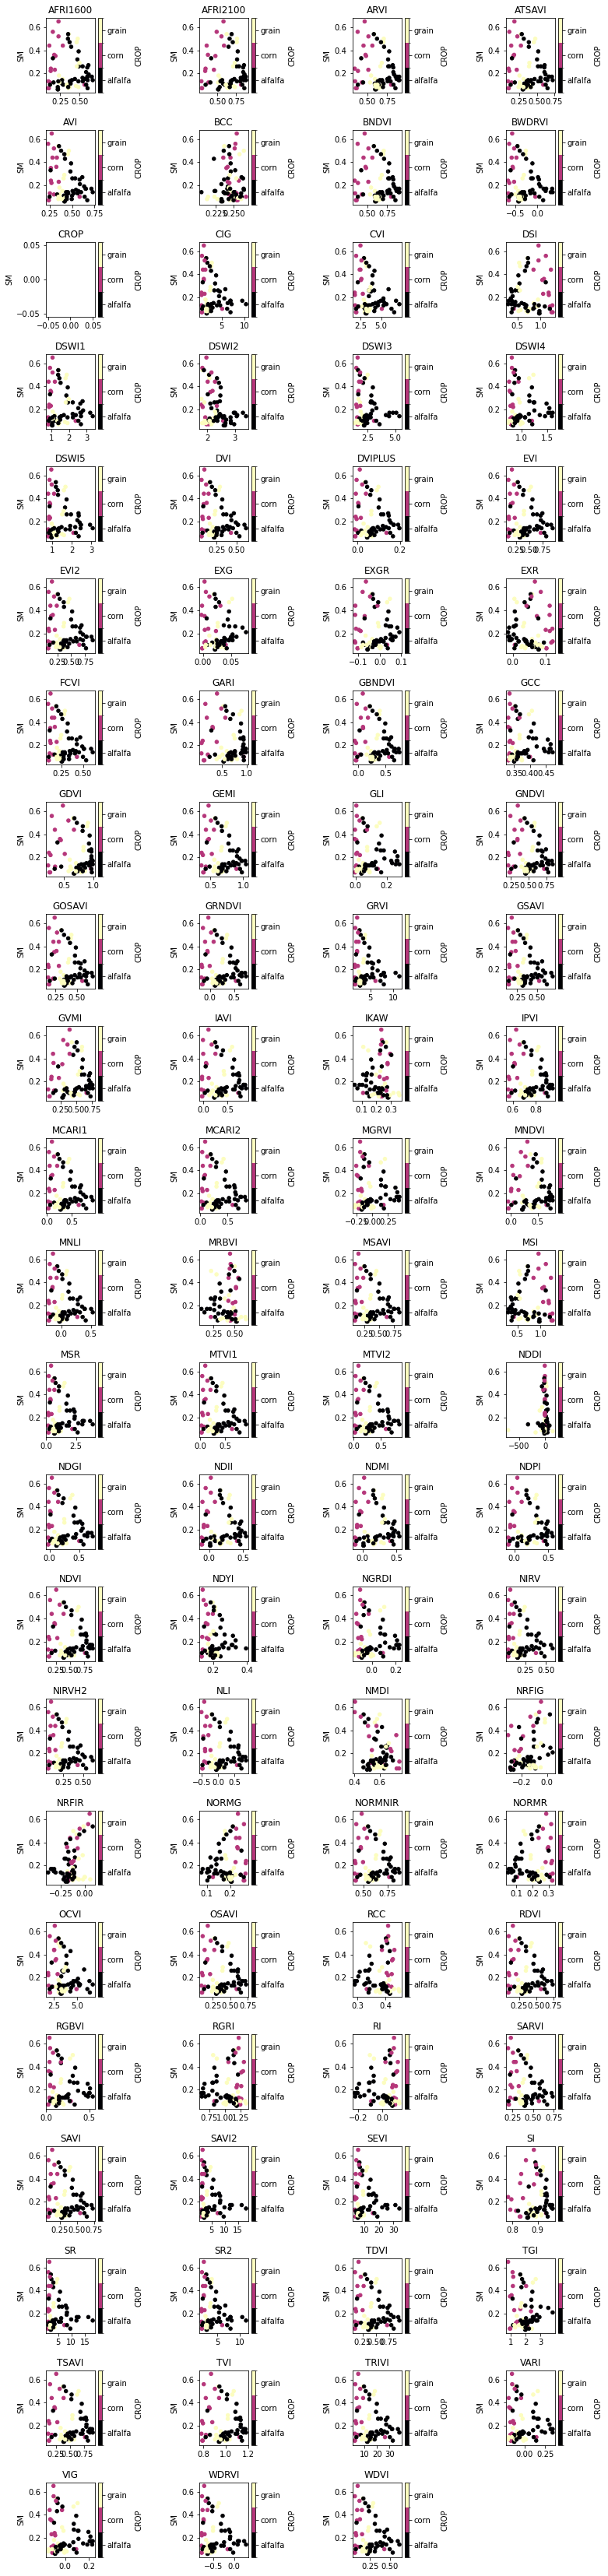

In [14]:

plt.figure(figsize=(12, 60))
plt.subplots_adjust(hspace=0.5, wspace=1.5)
# plt.suptitle("SM vs vegetation indices", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, veg_index in enumerate(vegetation):
    # add a new subplot iteratively
    ax = plt.subplot(23, 4, n + 1)

    # filter df and plot ticker on the new subplot axis
    df[df["variable"] == veg_index].plot(ax=ax, kind='scatter',y ='SM', x='values',c = 'CROP' , cmap = "magma")

    # chart formatting
    ax.set_title(veg_index.upper())
    # ax.get_legend().remove()
    ax.set_xlabel("")

We can see that a) there is no a "linear" relationship between any band and soil moisture and b) In the plots "SM vs NIR", "SM vs Temp", "SM vs SW1" and "SM vs SW2" se "see" a sort of "triangle" shape. This last data behavoir is what created the original "Triangle Method" to estimate plant water use and soil moisture. Paper here: https://www.mdpi.com/1424-8220/7/8/1612 

Let's evaluate the correlation strength of the vegetation indices and soil moisture

In [15]:
sm2 = sm.drop(columns=['CROP'])

var_cor = sm2[sm2.columns[:]].corr()['SM'][:-1]
var_cor

SR_B1   -0.026091
SR_B2   -0.058933
SR_B3   -0.026969
SR_B4   -0.369116
SR_B5   -0.252100
           ...   
TriVI   -0.224325
VARI    -0.073360
VIG     -0.072331
WDRVI   -0.151956
WDVI    -0.242154
Name: SM, Length: 97, dtype: float64

<AxesSubplot: >

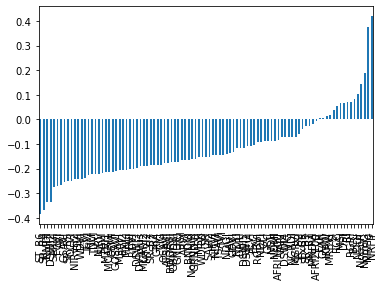

In [16]:
# var_cor=pd.concat([sm,var_cor]) #concatenating the SM table
#sorting the table based in the absolute corrlation values.
var_cor_sorted=var_cor.sort_values()
var_cor_sorted.plot.bar() # variables sorted by corrlation value (largest to smallest)


In [17]:
var_cor_sorted.head()

ST_B6   -0.384577
SR_B4   -0.369116
NMDI    -0.337182
DSWI2   -0.336945
SARVI   -0.275026
Name: SM, dtype: float64

In [18]:
var_cor_sorted.tail()

NDDI     0.103877
NormR    0.142583
NormG    0.187212
NRFIg    0.376183
NRFIr    0.418980
Name: SM, dtype: float64

Now we have a cleaned, sorted by correlation table we can use for regression.Let's save it so in the next notebook we can start applying machine learning.

In [19]:
import os
# defining directory for storing results
out_dir = os.path.join(os.path.expanduser('~'), 'Machine-Learning-Applications-in-Remote-Sensing-Data/Results Step 2/')
out_dir

'/home/jovyan/data/Machine-Learning-Applications-in-Remote-Sensing-Data/Results Step 2/'

In [20]:
filename=os.path.join(out_dir,'machine_learning_data.csv')
sm.to_csv(filename, index=False)